# Setup
This Jupyter Notebook is meant to be executed directly from Google Colab in a plug and play manner.
To enable this, the following code below can be run to set up the notebook

In [ ]:
import os
import sys

!git clone -b mfcc https://github.com/terryluan12/Genrify.git
!cd Genrify && make

sys.path.insert(0, "Genrify/src")

## Preprocessing Code
The following code can be run to download the datasets and preprocess the datasets

In [1]:
from datasources import download_datasets
from preprocessing import preprocess

c:\Users\Jack\.conda\envs\aps360\lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


In [2]:
# Make sure to change subset_num to the subset which you are using
subset_num = 3
method = "mfcc"
root_dir = "."
import os
if not os.path.isdir(os.path.join(root_dir, "datasources", "processed_data")):
    os.makedirs(os.path.join(root_dir, "datasources"), exist_ok=True)
    download_datasets(root_dir)

preprocess(subset_num, method, root_dir)

Splitting processed Data into 4 exclusive datasets.
Converting to MFCC


In [2]:
from cnn import mfcc_model, training
from utils import plot
from cnn.datahandler.DataHandler import DataHandler
import os
import torch

## Example to training an model

In [ ]:
mfcc_data_dir = os.path.join(root_dir, "datasources", "mfcc")
mfcc_data_handler = DataHandler(mfcc_data_dir, batch_size=32, num_workers=4)
for ss, g in [(10, 1.0), (10, 0.8)]:
    for lr in [5e-5, 1e-4, 2e-4, 3e-4, 5e-4]:
        num_epochs = 60
        mfcc_cnn = mfcc_model.MFCC_CNN()
        print(f"Learning rate: {lr}, Subset size: {ss}, Gamma: {g}")
        best_epoch = training.train(mfcc_cnn, mfcc_data_handler.train_loader, mfcc_data_handler.val_loader, num_epochs, lr, 32, ss, g)
        model_path = training.get_model_name(mfcc_cnn.name, 32, lr, best_epoch)
        %matplotlib inline
        plot.plot_training_curve(model_path)
        plot.plot_confusion_matrix(model_path, range(10))
        # test the model
        test_data = mfcc_data_handler.test_loader
        mfcc_cnn.load_state_dict(torch.load(f"./models/{model_path}.pt"))
        training.test_model(mfcc_cnn, test_data)

Learning rate: 5e-05, Subset size: 10, Gamma: 1.0
Epoch [1/60], Train Loss: 2.3523, Train Accuracy: 25.26%, Val Loss: 1.9987, Val Accuracy: 32.35%
Epoch [2/60], Train Loss: 1.6997, Train Accuracy: 37.63%, Val Loss: 1.6497, Val Accuracy: 37.17%
Epoch [3/60], Train Loss: 1.4967, Train Accuracy: 45.30%, Val Loss: 1.5762, Val Accuracy: 40.11%
Epoch [4/60], Train Loss: 1.4068, Train Accuracy: 49.66%, Val Loss: 1.4879, Val Accuracy: 46.26%
Epoch [5/60], Train Loss: 1.3395, Train Accuracy: 50.17%, Val Loss: 1.5146, Val Accuracy: 44.92%
Epoch [6/60], Train Loss: 1.2271, Train Accuracy: 55.78%, Val Loss: 1.3871, Val Accuracy: 49.73%
Epoch [7/60], Train Loss: 1.1089, Train Accuracy: 59.05%, Val Loss: 1.4524, Val Accuracy: 47.06%
Epoch [8/60], Train Loss: 1.0222, Train Accuracy: 63.46%, Val Loss: 1.3269, Val Accuracy: 49.73%
Epoch [9/60], Train Loss: 0.8892, Train Accuracy: 68.50%, Val Loss: 1.3169, Val Accuracy: 56.42%
Epoch [10/60], Train Loss: 0.8201, Train Accuracy: 69.93%, Val Loss: 1.3109, 

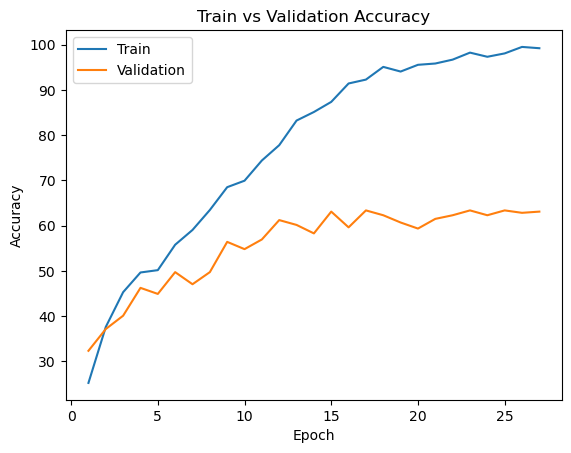

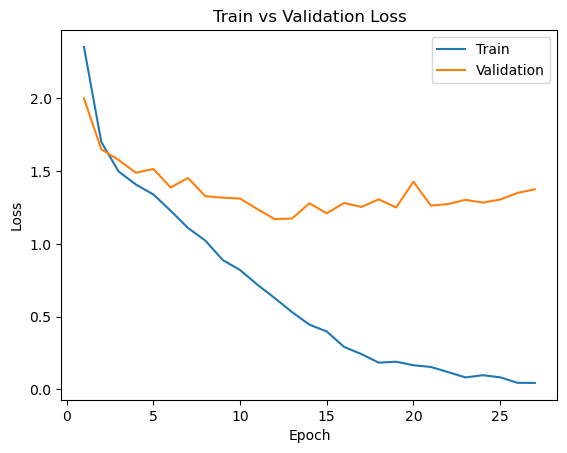

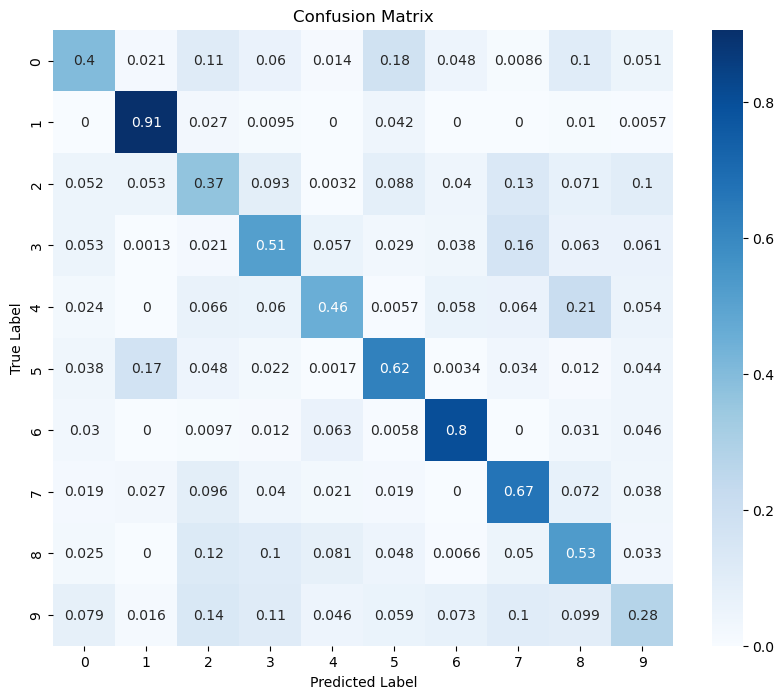

Test Accuracy: 61.33%
Learning rate: 0.0001, Subset size: 10, Gamma: 1.0
Epoch [1/60], Train Loss: 2.8893, Train Accuracy: 25.77%, Val Loss: 1.8718, Val Accuracy: 30.75%
Epoch [2/60], Train Loss: 1.6944, Train Accuracy: 35.91%, Val Loss: 1.6877, Val Accuracy: 36.36%
Epoch [3/60], Train Loss: 1.5703, Train Accuracy: 43.30%, Val Loss: 1.5947, Val Accuracy: 39.57%
Epoch [4/60], Train Loss: 1.4911, Train Accuracy: 45.65%, Val Loss: 1.5813, Val Accuracy: 41.18%
Epoch [5/60], Train Loss: 1.4120, Train Accuracy: 47.65%, Val Loss: 1.5588, Val Accuracy: 41.18%
Epoch [6/60], Train Loss: 1.3494, Train Accuracy: 50.23%, Val Loss: 1.4406, Val Accuracy: 49.47%
Epoch [7/60], Train Loss: 1.2412, Train Accuracy: 55.27%, Val Loss: 1.4897, Val Accuracy: 44.12%
Epoch [8/60], Train Loss: 1.1444, Train Accuracy: 58.93%, Val Loss: 1.3285, Val Accuracy: 51.34%
Epoch [9/60], Train Loss: 1.0479, Train Accuracy: 62.94%, Val Loss: 1.2627, Val Accuracy: 55.61%
Epoch [10/60], Train Loss: 0.9091, Train Accuracy: 67.

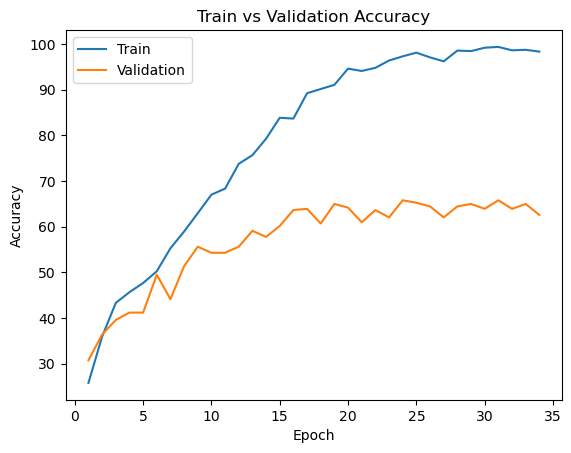

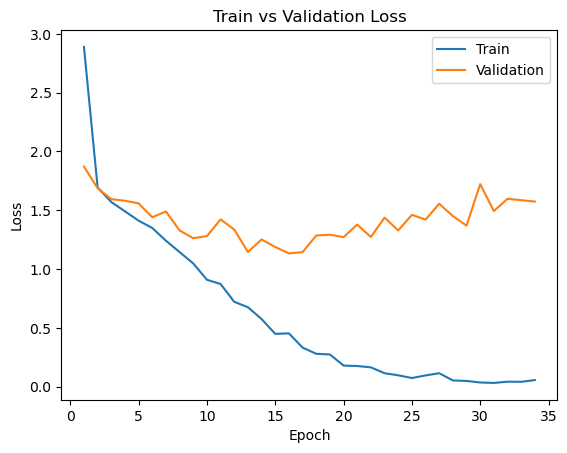

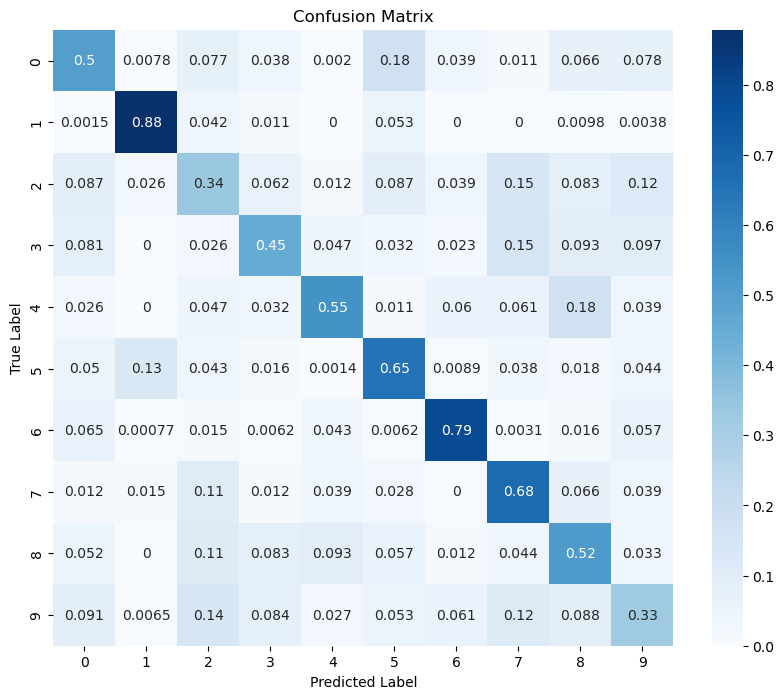

Test Accuracy: 64.53%
Learning rate: 0.0002, Subset size: 10, Gamma: 1.0
Epoch [1/60], Train Loss: 3.8105, Train Accuracy: 18.04%, Val Loss: 2.2190, Val Accuracy: 19.25%
Epoch [2/60], Train Loss: 1.8781, Train Accuracy: 30.64%, Val Loss: 1.8971, Val Accuracy: 32.35%
Epoch [3/60], Train Loss: 1.6516, Train Accuracy: 38.26%, Val Loss: 1.6583, Val Accuracy: 39.57%
Epoch [4/60], Train Loss: 1.5701, Train Accuracy: 41.92%, Val Loss: 1.6274, Val Accuracy: 40.64%
Epoch [5/60], Train Loss: 1.5304, Train Accuracy: 43.07%, Val Loss: 1.6297, Val Accuracy: 39.30%
Epoch [6/60], Train Loss: 1.4725, Train Accuracy: 47.25%, Val Loss: 1.5204, Val Accuracy: 41.44%
Epoch [7/60], Train Loss: 1.3887, Train Accuracy: 48.11%, Val Loss: 1.5023, Val Accuracy: 46.26%
Epoch [8/60], Train Loss: 1.3392, Train Accuracy: 51.37%, Val Loss: 1.3988, Val Accuracy: 46.79%
Epoch [9/60], Train Loss: 1.2134, Train Accuracy: 55.61%, Val Loss: 1.3767, Val Accuracy: 48.93%
Epoch [10/60], Train Loss: 1.1439, Train Accuracy: 57.

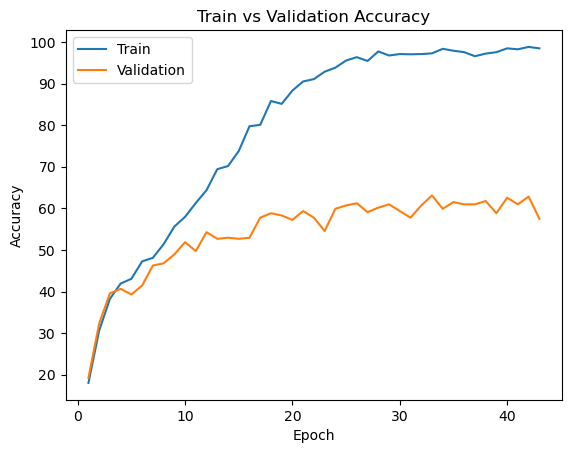

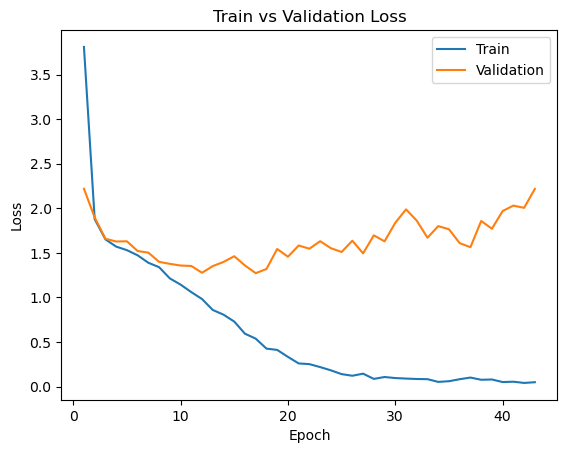

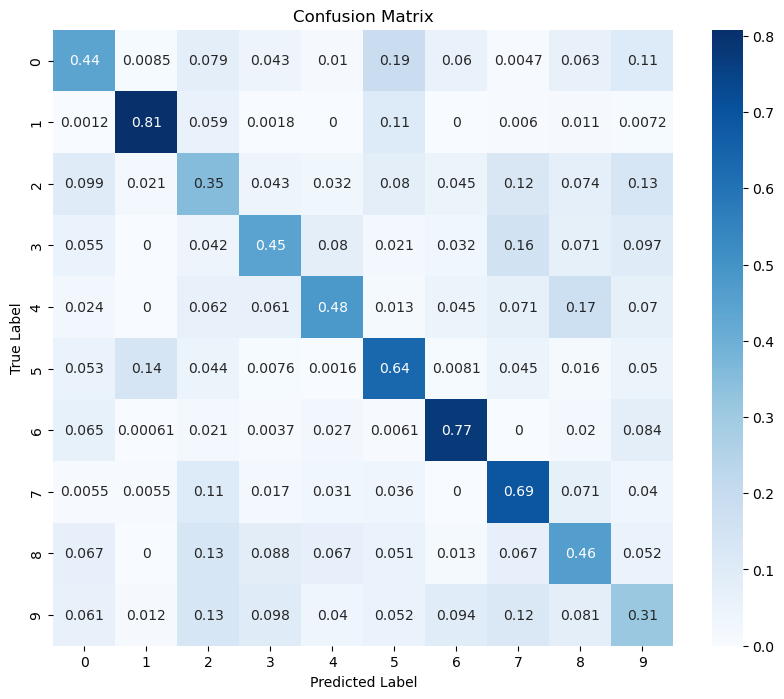

Test Accuracy: 62.67%
Learning rate: 0.0003, Subset size: 10, Gamma: 1.0
Epoch [1/60], Train Loss: 4.6738, Train Accuracy: 15.52%, Val Loss: 2.1481, Val Accuracy: 20.59%
Epoch [2/60], Train Loss: 2.0160, Train Accuracy: 27.26%, Val Loss: 1.9299, Val Accuracy: 26.20%
Epoch [3/60], Train Loss: 1.7395, Train Accuracy: 36.94%, Val Loss: 1.6802, Val Accuracy: 36.36%
Epoch [4/60], Train Loss: 1.6507, Train Accuracy: 40.55%, Val Loss: 1.6978, Val Accuracy: 37.17%
Epoch [5/60], Train Loss: 1.6090, Train Accuracy: 42.21%, Val Loss: 1.6765, Val Accuracy: 38.50%
Epoch [6/60], Train Loss: 1.5656, Train Accuracy: 43.53%, Val Loss: 1.5910, Val Accuracy: 40.37%
Epoch [7/60], Train Loss: 1.5079, Train Accuracy: 43.53%, Val Loss: 1.5343, Val Accuracy: 43.05%
Epoch [8/60], Train Loss: 1.4248, Train Accuracy: 46.11%, Val Loss: 1.5906, Val Accuracy: 38.77%
Epoch [9/60], Train Loss: 1.3868, Train Accuracy: 48.57%, Val Loss: 1.5906, Val Accuracy: 43.05%
Epoch [10/60], Train Loss: 1.3134, Train Accuracy: 52.

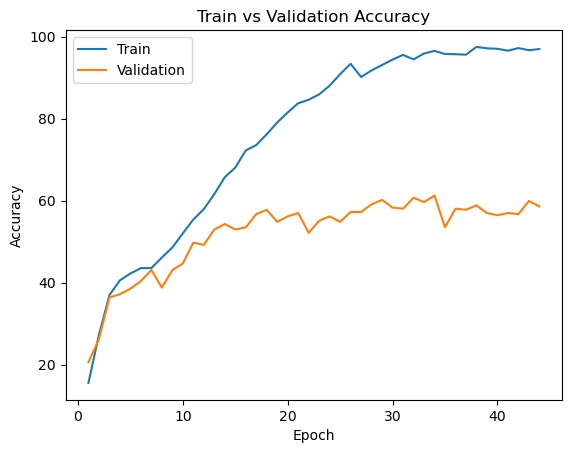

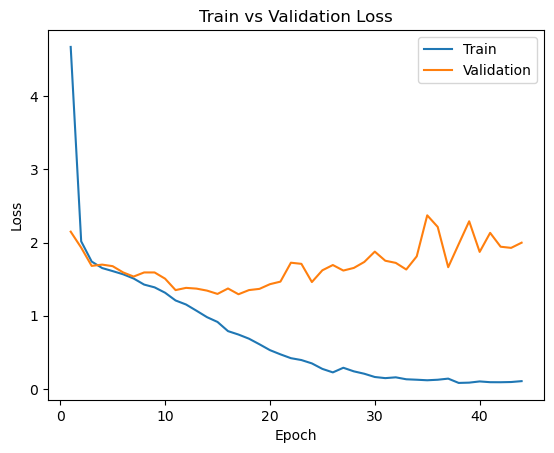

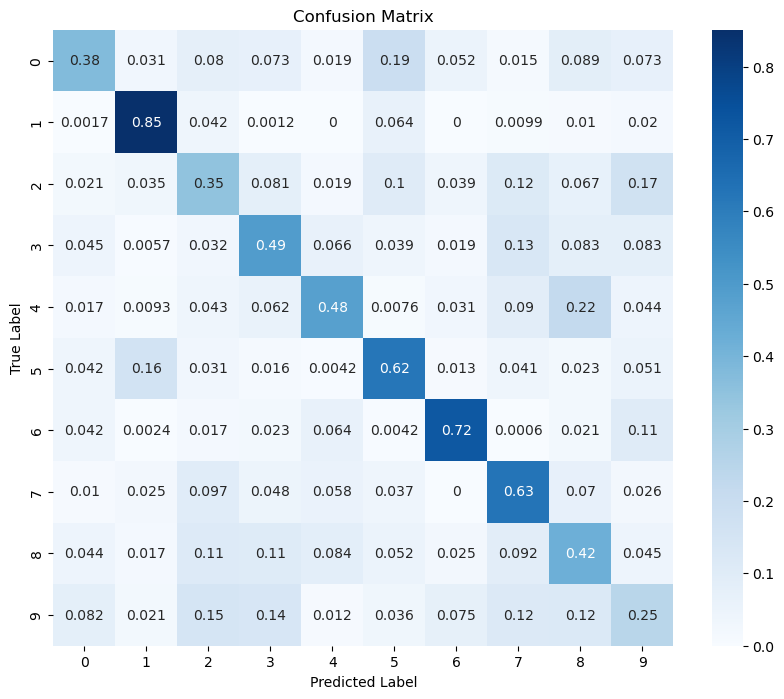

Test Accuracy: 59.47%
Learning rate: 0.0005, Subset size: 10, Gamma: 1.0
Epoch [1/60], Train Loss: 5.2478, Train Accuracy: 13.97%, Val Loss: 2.2527, Val Accuracy: 14.71%
Epoch [2/60], Train Loss: 2.2035, Train Accuracy: 18.73%, Val Loss: 2.1684, Val Accuracy: 18.72%
Epoch [3/60], Train Loss: 2.0878, Train Accuracy: 24.05%, Val Loss: 2.0295, Val Accuracy: 29.14%
Epoch [4/60], Train Loss: 1.8589, Train Accuracy: 31.39%, Val Loss: 1.7727, Val Accuracy: 31.28%
Epoch [5/60], Train Loss: 1.7233, Train Accuracy: 35.34%, Val Loss: 1.7378, Val Accuracy: 35.56%
Epoch [6/60], Train Loss: 1.6306, Train Accuracy: 37.92%, Val Loss: 1.6103, Val Accuracy: 35.56%
Epoch [7/60], Train Loss: 1.5818, Train Accuracy: 41.29%, Val Loss: 1.6147, Val Accuracy: 38.24%
Epoch [8/60], Train Loss: 1.5509, Train Accuracy: 42.10%, Val Loss: 1.5760, Val Accuracy: 37.97%
Epoch [9/60], Train Loss: 1.4692, Train Accuracy: 45.93%, Val Loss: 1.5212, Val Accuracy: 44.39%
Epoch [10/60], Train Loss: 1.4548, Train Accuracy: 46.

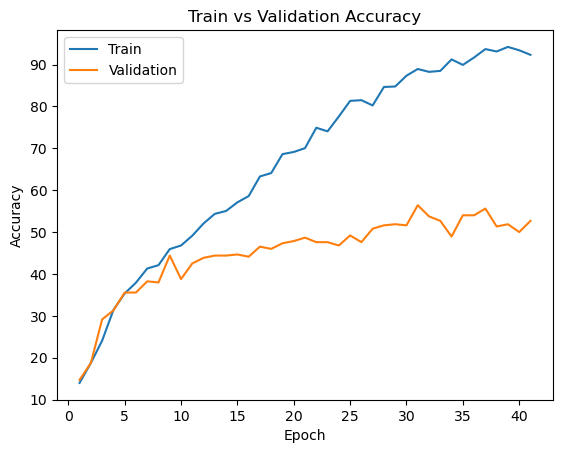

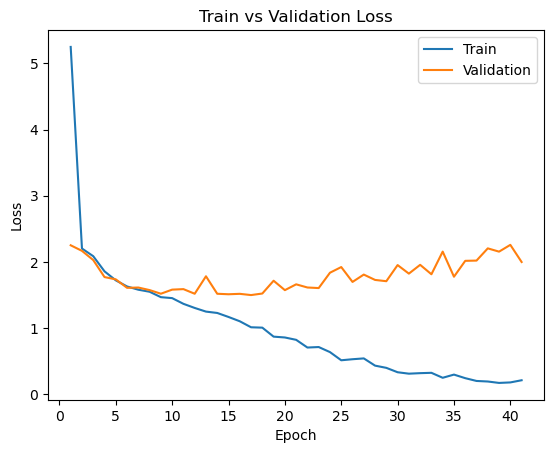

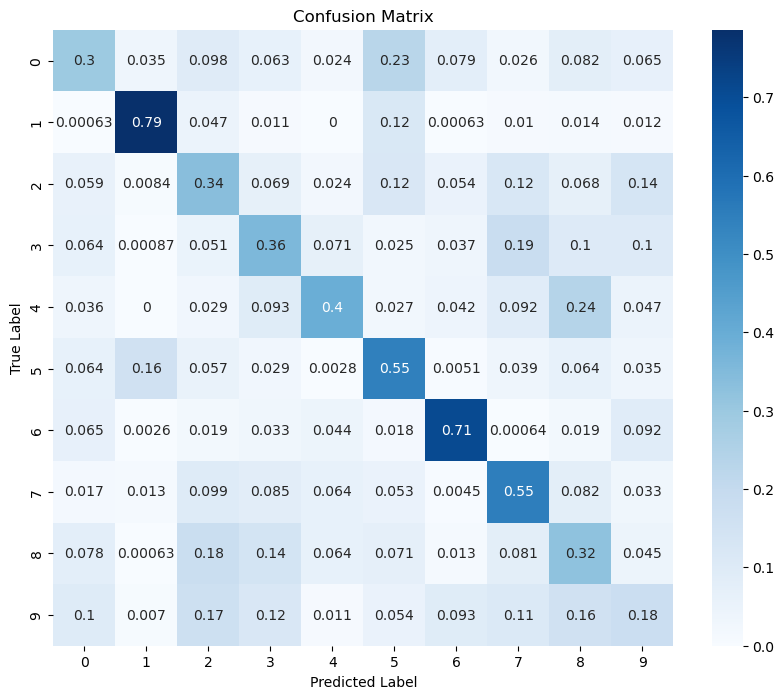

Test Accuracy: 53.60%
Learning rate: 5e-05, Subset size: 10, Gamma: 0.8
Epoch [1/60], Train Loss: 2.4204, Train Accuracy: 25.43%, Val Loss: 1.7869, Val Accuracy: 35.03%
Epoch [2/60], Train Loss: 1.6417, Train Accuracy: 38.49%, Val Loss: 1.6718, Val Accuracy: 36.63%
Epoch [3/60], Train Loss: 1.4867, Train Accuracy: 45.25%, Val Loss: 1.5179, Val Accuracy: 44.12%
Epoch [4/60], Train Loss: 1.4032, Train Accuracy: 49.66%, Val Loss: 1.4715, Val Accuracy: 43.58%
Epoch [5/60], Train Loss: 1.2715, Train Accuracy: 53.38%, Val Loss: 1.4469, Val Accuracy: 48.40%
Epoch [6/60], Train Loss: 1.2173, Train Accuracy: 56.93%, Val Loss: 1.3720, Val Accuracy: 51.60%
Epoch [7/60], Train Loss: 1.0684, Train Accuracy: 62.83%, Val Loss: 1.3069, Val Accuracy: 52.94%
Epoch [8/60], Train Loss: 1.0441, Train Accuracy: 62.94%, Val Loss: 1.3529, Val Accuracy: 54.55%
Epoch [9/60], Train Loss: 0.9025, Train Accuracy: 69.07%, Val Loss: 1.3395, Val Accuracy: 53.48%
Epoch [10/60], Train Loss: 0.7521, Train Accuracy: 74.3

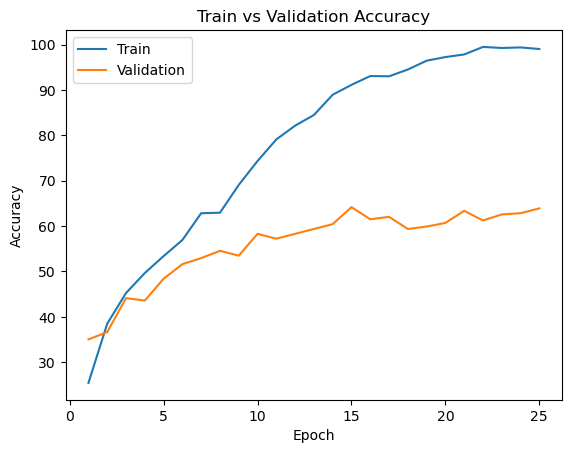

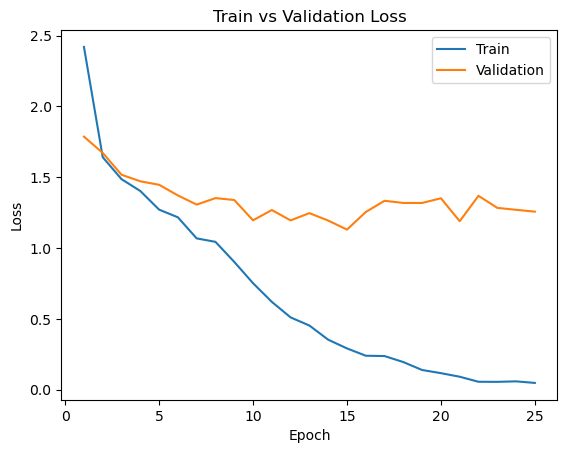

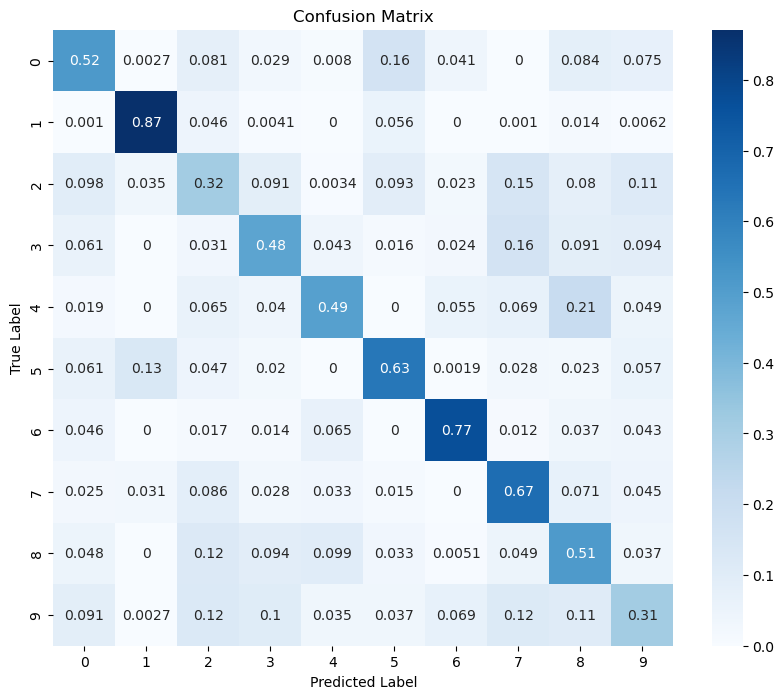

Test Accuracy: 62.40%
Learning rate: 0.0001, Subset size: 10, Gamma: 0.8
Epoch [1/60], Train Loss: 2.8675, Train Accuracy: 21.08%, Val Loss: 1.8506, Val Accuracy: 33.69%
Epoch [2/60], Train Loss: 1.7101, Train Accuracy: 37.57%, Val Loss: 1.7126, Val Accuracy: 34.76%
Epoch [3/60], Train Loss: 1.5824, Train Accuracy: 41.35%, Val Loss: 1.5759, Val Accuracy: 41.98%
Epoch [4/60], Train Loss: 1.5239, Train Accuracy: 44.90%, Val Loss: 1.7238, Val Accuracy: 36.10%
Epoch [5/60], Train Loss: 1.4553, Train Accuracy: 46.51%, Val Loss: 1.5305, Val Accuracy: 37.70%
Epoch [6/60], Train Loss: 1.3780, Train Accuracy: 49.48%, Val Loss: 1.6002, Val Accuracy: 44.39%
Epoch [7/60], Train Loss: 1.2554, Train Accuracy: 54.81%, Val Loss: 1.4323, Val Accuracy: 48.13%
Epoch [8/60], Train Loss: 1.1931, Train Accuracy: 56.07%, Val Loss: 1.3948, Val Accuracy: 49.73%
Epoch [9/60], Train Loss: 1.1063, Train Accuracy: 58.82%, Val Loss: 1.3400, Val Accuracy: 50.53%
Epoch [10/60], Train Loss: 0.9773, Train Accuracy: 65.

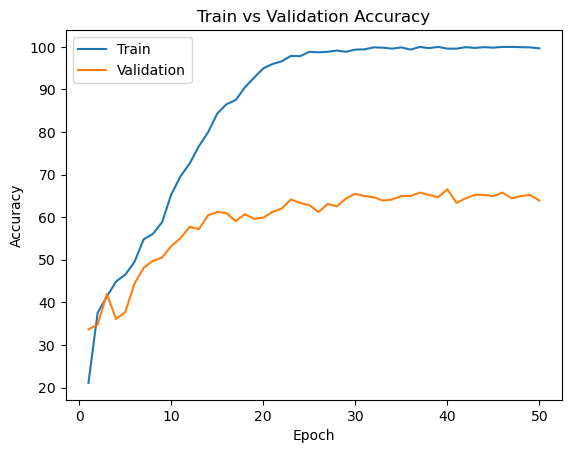

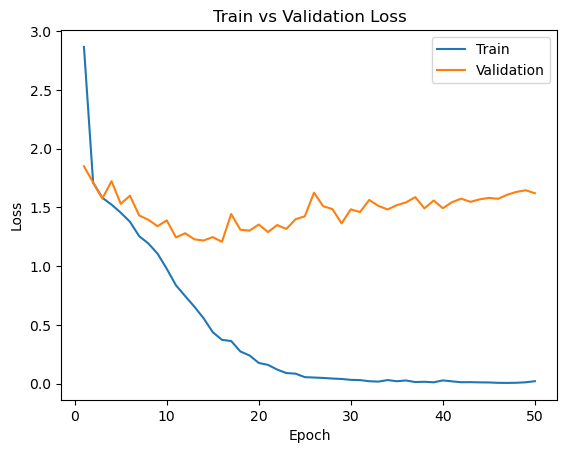

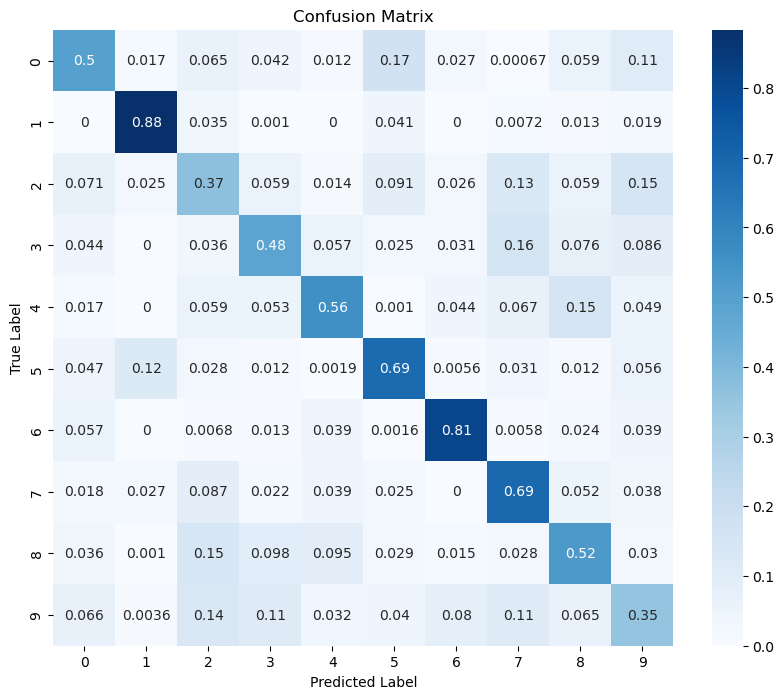

Test Accuracy: 65.07%
Learning rate: 0.0002, Subset size: 10, Gamma: 0.8
Epoch [1/60], Train Loss: 3.3910, Train Accuracy: 19.70%, Val Loss: 2.1726, Val Accuracy: 21.12%
Epoch [2/60], Train Loss: 1.8992, Train Accuracy: 30.01%, Val Loss: 1.7873, Val Accuracy: 33.16%
Epoch [3/60], Train Loss: 1.6383, Train Accuracy: 38.89%, Val Loss: 1.6981, Val Accuracy: 34.22%
Epoch [4/60], Train Loss: 1.6061, Train Accuracy: 40.32%, Val Loss: 1.6949, Val Accuracy: 38.24%
Epoch [5/60], Train Loss: 1.5331, Train Accuracy: 44.50%, Val Loss: 1.5553, Val Accuracy: 41.71%
Epoch [6/60], Train Loss: 1.4290, Train Accuracy: 46.62%, Val Loss: 1.4990, Val Accuracy: 43.05%
Epoch [7/60], Train Loss: 1.3927, Train Accuracy: 48.11%, Val Loss: 1.5492, Val Accuracy: 44.65%
Epoch [8/60], Train Loss: 1.3117, Train Accuracy: 52.35%, Val Loss: 1.4508, Val Accuracy: 45.45%
Epoch [9/60], Train Loss: 1.2430, Train Accuracy: 54.52%, Val Loss: 1.3630, Val Accuracy: 50.80%
Epoch [10/60], Train Loss: 1.1179, Train Accuracy: 59.

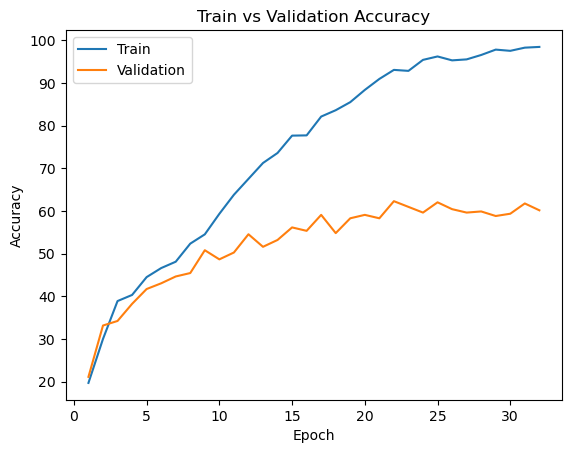

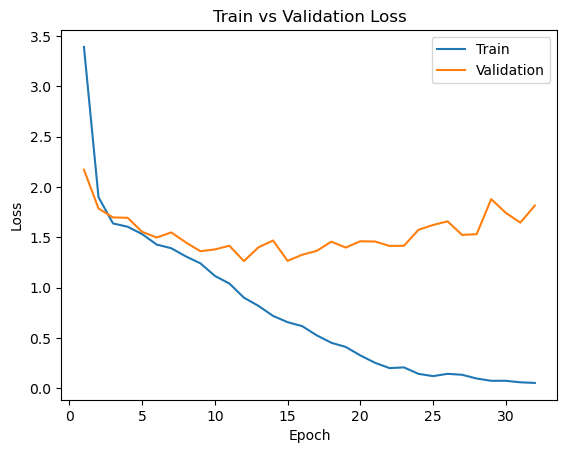

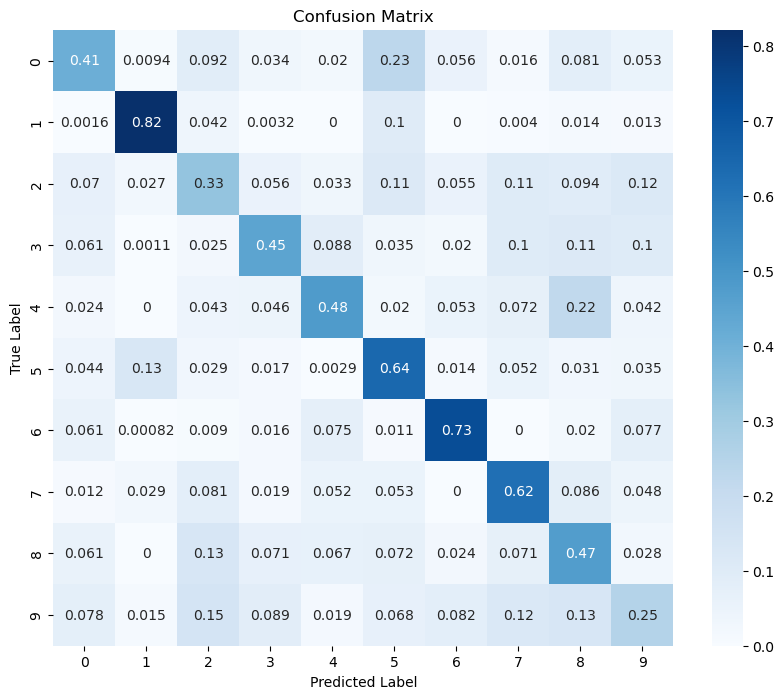

Test Accuracy: 60.53%
Learning rate: 0.0003, Subset size: 10, Gamma: 0.8
Epoch [1/60], Train Loss: 3.8041, Train Accuracy: 16.84%, Val Loss: 2.2775, Val Accuracy: 19.25%
Epoch [2/60], Train Loss: 2.0559, Train Accuracy: 22.91%, Val Loss: 2.0235, Val Accuracy: 24.33%
Epoch [3/60], Train Loss: 1.7925, Train Accuracy: 34.42%, Val Loss: 1.8217, Val Accuracy: 30.75%
Epoch [4/60], Train Loss: 1.6852, Train Accuracy: 37.69%, Val Loss: 1.7531, Val Accuracy: 32.89%
Epoch [5/60], Train Loss: 1.5630, Train Accuracy: 41.58%, Val Loss: 1.6301, Val Accuracy: 39.04%
Epoch [6/60], Train Loss: 1.5441, Train Accuracy: 42.21%, Val Loss: 1.7822, Val Accuracy: 36.63%
Epoch [7/60], Train Loss: 1.5136, Train Accuracy: 43.93%, Val Loss: 1.5694, Val Accuracy: 43.05%
Epoch [8/60], Train Loss: 1.4322, Train Accuracy: 46.39%, Val Loss: 1.4754, Val Accuracy: 45.19%
Epoch [9/60], Train Loss: 1.4133, Train Accuracy: 48.63%, Val Loss: 1.5822, Val Accuracy: 40.64%
Epoch [10/60], Train Loss: 1.3310, Train Accuracy: 50.

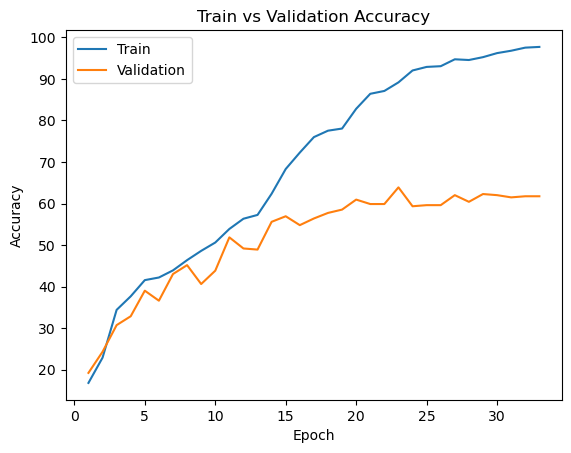

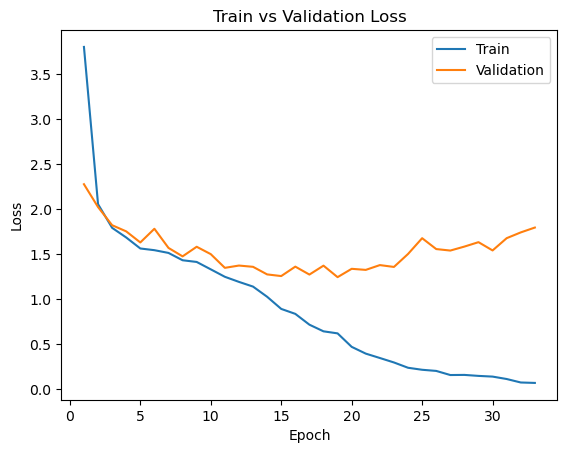

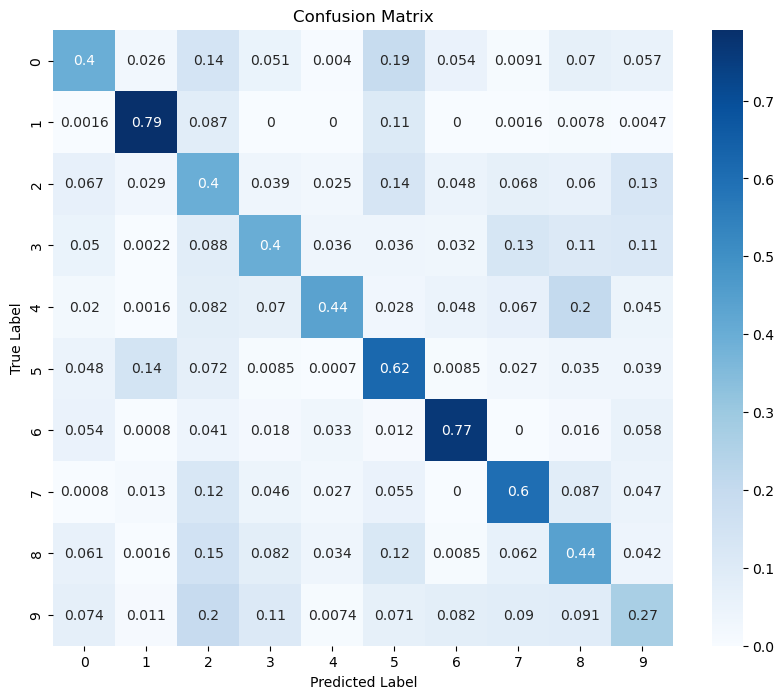

Test Accuracy: 64.00%
Learning rate: 0.0005, Subset size: 10, Gamma: 0.8
Epoch [1/60], Train Loss: 5.0708, Train Accuracy: 11.45%, Val Loss: 2.2796, Val Accuracy: 11.50%
Epoch [2/60], Train Loss: 2.2231, Train Accuracy: 16.67%, Val Loss: 2.2094, Val Accuracy: 14.97%
Epoch [3/60], Train Loss: 2.1241, Train Accuracy: 21.25%, Val Loss: 2.0808, Val Accuracy: 24.60%
Epoch [4/60], Train Loss: 2.0299, Train Accuracy: 24.34%, Val Loss: 2.0444, Val Accuracy: 25.94%
Epoch [5/60], Train Loss: 1.9358, Train Accuracy: 29.44%, Val Loss: 1.9290, Val Accuracy: 28.61%
Epoch [6/60], Train Loss: 1.8218, Train Accuracy: 32.88%, Val Loss: 1.7679, Val Accuracy: 37.17%
Epoch [7/60], Train Loss: 1.6506, Train Accuracy: 38.95%, Val Loss: 1.6472, Val Accuracy: 35.56%
Epoch [8/60], Train Loss: 1.6223, Train Accuracy: 39.52%, Val Loss: 1.6501, Val Accuracy: 37.17%
Epoch [9/60], Train Loss: 1.6057, Train Accuracy: 39.92%, Val Loss: 1.5989, Val Accuracy: 39.57%
Epoch [10/60], Train Loss: 1.5665, Train Accuracy: 41.

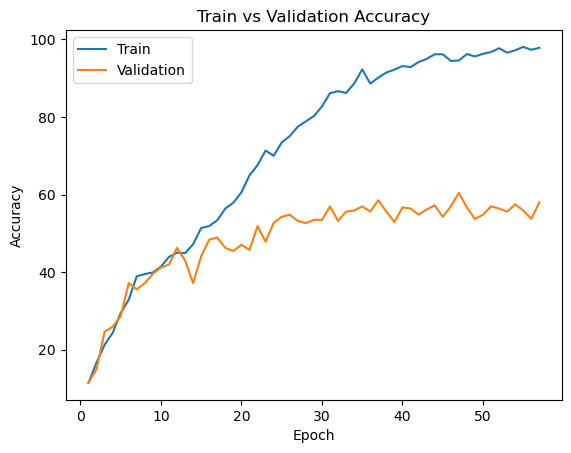

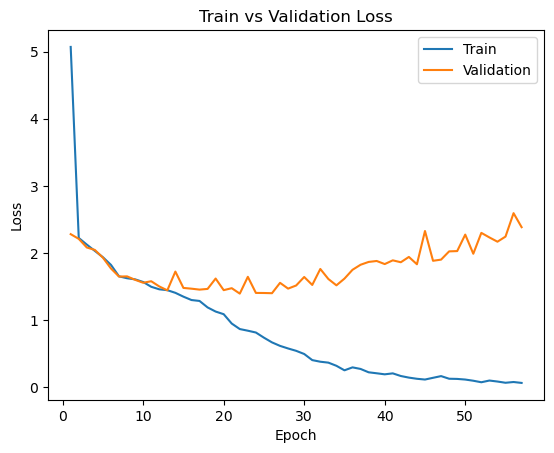

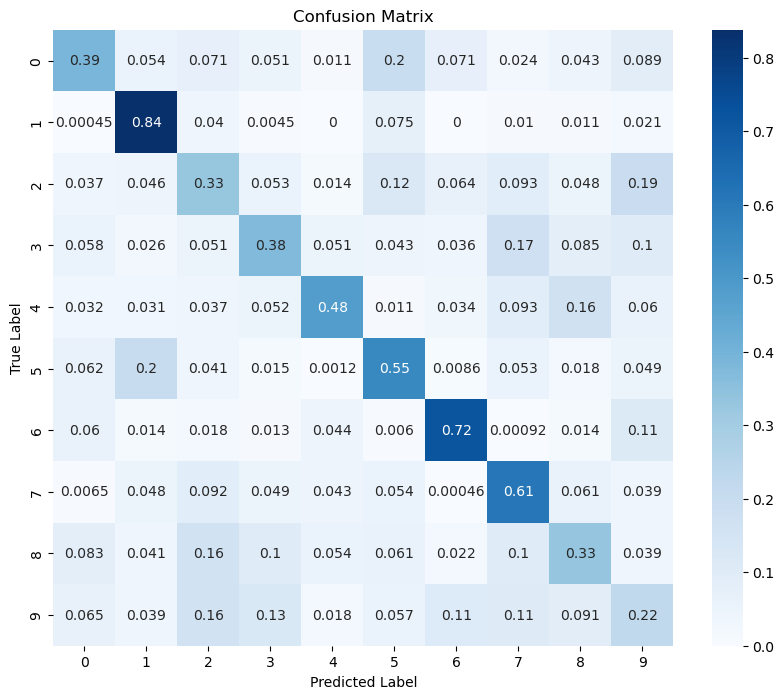

Test Accuracy: 59.47%


In [4]:
mfcc_data_dir = os.path.join(root_dir, "datasources", "mfcc")
mfcc_data_handler = DataHandler(mfcc_data_dir, batch_size=32, num_workers=4)
for ss, g in [(10, 1.0), (10, 0.8)]:
    for lr in [5e-5, 1e-4, 2e-4, 3e-4, 5e-4]:
        num_epochs = 60
        mfcc_cnn = mfcc_model.MFCC_CNN_2conv()
        print(f"Learning rate: {lr}, Subset size: {ss}, Gamma: {g}")
        best_epoch = training.train(mfcc_cnn, mfcc_data_handler.train_loader, mfcc_data_handler.val_loader, num_epochs, lr, 32, ss, g, patience=10)
        model_path = training.get_model_name(mfcc_cnn.name, 32, lr, best_epoch)
        %matplotlib inline
        plot.plot_training_curve(model_path)
        plot.plot_confusion_matrix(model_path, range(10))
        # test the model
        test_data = mfcc_data_handler.test_loader
        mfcc_cnn.load_state_dict(torch.load(f"./models/{model_path}.pt"))
        training.test_model(mfcc_cnn, test_data)

In [27]:
import torchaudio
import torchaudio.transforms as transforms

def audio_to_mfcc(file_path, duration=3):
    waveform, sr = torchaudio.load(file_path, normalize=True)

    n_fft = 2048
    win_length = None
    hop_length = 4
    n_mels = 256
    n_mfcc = 256
    transform_mfcc = transforms.MFCC(
        sample_rate=sr,
        n_mfcc=n_mfcc,
        melkwargs={
                "n_fft": n_fft,
                "win_length": win_length,
                "hop_length": hop_length,
                "n_mels": n_mels,
        }
    )
    print(sr)
    
    mfcc = transform_mfcc(waveform)

    # reshape mfcc so that the sequence length is the first dimension
    mfcc = mfcc.reshape(mfcc.shape[1], mfcc.shape[2])

    return mfcc
    

In [28]:
audio_to_mfcc("./datasources/processed_data/jazz/jazz.00000.wav_trimmed1.wav").shape

22050


torch.Size([256, 16538])

In [6]:
import os
import torchaudio
import torchaudio.transforms as transforms
from torch.utils.data import Dataset, DataLoader


In [29]:
class MFCCDataset(Dataset):
    def __init__(self, root_dir, sampling_rate=22050):
        self.root_dir = root_dir
        self.sampling_rate = sampling_rate
        n_fft = 2048
        win_length = None
        hop_length = 4
        n_mels = 256
        n_mfcc = 256
        self.transform = transforms.MFCC(
            sample_rate=self.sampling_rate,
            n_mfcc=n_mfcc,
            melkwargs={
                "n_fft": n_fft,
                "win_length": win_length,
                "hop_length": hop_length,
                "n_mels": n_mels,
            },
        )
        self.data = []
        self.labels = []
        self._load_data()

    def _load_data(self):
        label_dirs = sorted(os.listdir(self.root_dir))
        for label_id, label in enumerate(label_dirs):
            label_path = os.path.join(self.root_dir, label)
            if os.path.isdir(label_path):
                files = sorted(os.listdir(label_path))
                for file in files:
                    file_path = os.path.join(label_path, file)
                    self.data.append(file_path)
                    self.labels.append(label_id)

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        audio_file = self.data[idx]
        waveform, _ = torchaudio.load(audio_file, normalize=True)
        
        # Apply MFCC transformation
        mfcc = self.transform(waveform)
        # reshape mfcc so that the sequence length is the first dimension
        mfcc = mfcc.reshape(mfcc.shape[1], mfcc.shape[2])
        
        return mfcc, self.labels[idx]


In [31]:
def get_data_loaders(root_dir, batch_size, train_val_split=0.7, val_test_split=0.5):
    dataset = MFCCDataset(root_dir)
    
    num_train = int(train_val_split * len(dataset))
    num_val = int((len(dataset) - num_train) * val_test_split)
    num_test = len(dataset) - num_train - num_val

    train_dataset, val_dataset, test_dataset = torch.utils.data.random_split(dataset, [num_train, num_val, num_test])

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

    return train_loader, val_loader, test_loader


In [32]:
lstm_train_loader, lstm_val_loader, lstm_test_loader = get_data_loaders("./datasources/processed_data", 32)

In [33]:
from torch import nn

class AudioLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(AudioLSTM, self).__init__()
        self.name = "AudioLSTM"
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.dropout = nn.Dropout(0.2)
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        # Set initial hidden and cell states
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)

        # Forward propagate LSTM
        out, _ = self.lstm(x, (h0, c0))

        # Apply dropout
        out = self.dropout(out)
        
        # Decode the hidden state of the last time step
        out = self.fc(out[:, -1, :])
        return out

In [34]:
from cnn import mfcc_model, training
input_size = 0
for data, label in lstm_train_loader:
    input_size = data.shape[2]
    break
for ss, g in [(10, 1.0), (10, 0.8)]:
    for lr in [5e-5, 1e-4, 2e-4, 3e-4, 5e-4]:
        num_epochs = 60
        mfcc_cnn = AudioLSTM(input_size=input_size, hidden_size=1024, num_layers=2, num_classes=10)
        print(f"Learning rate: {lr}, Subset size: {ss}, Gamma: {g}, input_size: {input_size}")
        best_epoch = training.train(mfcc_cnn, lstm_train_loader, lstm_val_loader, num_epochs, lr, 32, ss, g, patience=5)
        model_path = training.get_model_name(mfcc_cnn.name, 32, lr, best_epoch)
        %matplotlib inline
        plot.plot_training_curve(model_path)
        plot.plot_confusion_matrix(model_path, range(10))
        # test the model
        mfcc_cnn.load_state_dict(torch.load(f"./models/{model_path}.pt"))
        training.test_model(mfcc_cnn, lstm_test_loader)

Learning rate: 5e-05, Subset size: 10, Gamma: 1.0, input_size: 16538
